In [104]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import math 
import sys

In [5]:
bom_movie_gross_clean = pd.read_csv('bom_movie_gross_clean.csv')
bom_movie_gross_clean

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3351,The Quake,Magn.,6200.0,2018
3352,Edward II (2018 re-release),FM,4800.0,2018
3353,El Pacto,Sony,2500.0,2018
3354,The Swan,Synergetic,2400.0,2018


In [27]:
bom_movie_gross_30m = bom_movie_gross_clean[bom_movie_gross_clean['domestic_gross'] > 30000000]

In [28]:
bom_movie_gross_30m

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3144,Uncle Drew,LG/S,42500000.0,2018
3145,Tyler Perry's Acrimony,LGF,43500000.0,2018
3150,Holmes and Watson,Sony,30600000.0,2018
3156,Death Wish (2018),MGM,34000000.0,2018


In [40]:
num_of_movies = bom_movie_gross_30m.groupby('studio').count()
num_of_values = num_of_movies.sort_values('title', ascending = False)

In [42]:
sum_of_revenue = bom_movie_gross_30m.groupby('studio').sum()

In [44]:
sum_of_revenue

,domestic_gross,year
studio,,
A24,9.310000e+07,4035
Annapurna,4.780000e+07,2018
Aviron,3.100000e+07,2017
BV,1.810330e+10,171184
CBS,1.557000e+08,6035
ENTMP,4.430000e+07,2017
FD,3.164000e+08,10060
Focus,6.155000e+08,26183
Fox,1.054740e+10,215473


In [24]:
num_of_values = num_of_values[0:15]

In [25]:
num_of_values = num_of_values.reset_index()

In [26]:
num_of_values

,index,studio,title,domestic_gross,year
0,0,Uni.,126,126,126
1,1,Fox,114,114,114
2,2,WB,111,111,111
3,3,BV,90,90,90
4,4,Sony,85,85,85
5,5,Par.,81,81,81
6,6,LGF,56,56,56
7,7,WB (NL),44,44,44
8,8,SGem,30,30,30
9,9,LG/S,28,28,28


In [47]:
merged_db= num_of_values.merge(sum_of_revenue, on='studio',  how='inner')

In [82]:
merged_db = merged_db.reset_index()
merged_db= merged_db[:15]

In [88]:
merged_db.head()

,level_0,index,studio,title,domestic_gross_x,year_x,domestic_gross_y,year_y
0,0,0,Uni.,112,112,112,1.235350e+10,225608
1,1,1,Fox,107,107,107,1.054740e+10,215473
2,2,2,WB,101,101,101,1.165500e+10,203394
3,3,3,BV,85,85,85,1.810330e+10,171184
4,4,4,Sony,81,81,81,8.283700e+09,163109


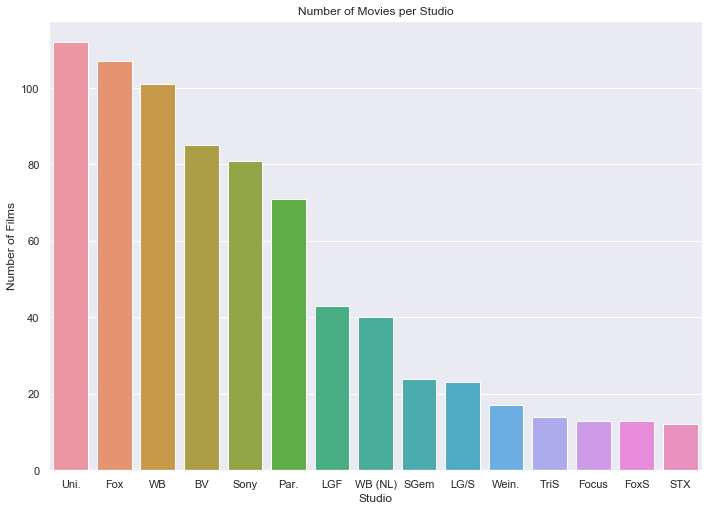

Text(0.5, 1.0, 'Total Gross per Studio')

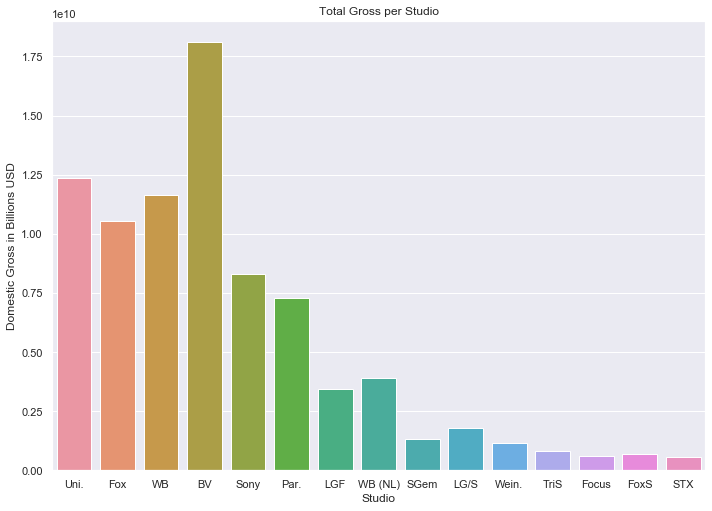

In [119]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})


axis= sns.barplot(x='studio', y='title', data=merged_db);
axis= axis.set(xlabel='Studio', ylabel='Number of Films',)
plt.title('Number of Movies per Studio')
plt.show()

axis2=sns.barplot(x='studio', y='domestic_gross_y', data=merged_db);
axis2.set(xlabel='Studio', ylabel='Domestic Gross in Billions USD');
plt.title('Total Gross per Studio')

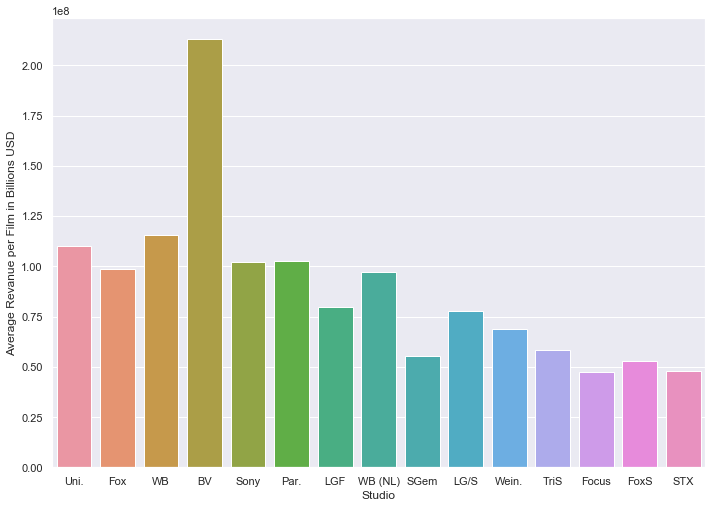

In [118]:

axis3= sns.barplot(x='studio', y='Ave_per_movie', data=merged_db);
axi3s= axis3.set(xlabel='Studio', ylabel='Average Revanue per Film in Billions USD')

In [93]:
merged_db['Ave_per_movie']= merged_db['domestic_gross_y'] / merged_db['title']

In [120]:
# domestic_gross_x & year_x = count of titles per studio
merged_db

,level_0,index,studio,title,domestic_gross_x,year_x,domestic_gross_y,year_y,Ave_per_movie
0,0,0,Uni.,112,112,112,1.235350e+10,225608,1.102991e+08
1,1,1,Fox,107,107,107,1.054740e+10,215473,9.857383e+07
2,2,2,WB,101,101,101,1.165500e+10,203394,1.153960e+08
3,3,3,BV,85,85,85,1.810330e+10,171184,2.129800e+08
4,4,4,Sony,81,81,81,8.283700e+09,163109,1.022679e+08
5,5,5,Par.,71,71,71,7.280900e+09,142972,1.025479e+08
6,6,6,LGF,43,43,43,3.435600e+09,86593,7.989767e+07
7,7,7,WB (NL),40,40,40,3.886400e+09,80573,9.716000e+07
8,8,8,SGem,24,24,24,1.327800e+09,48303,5.532500e+07
9,9,9,LG/S,23,23,23,1.791900e+09,46341,7.790870e+07


In [121]:
movie_budgets = pd.read_csv('movie_budgets_clean.csv')

In [122]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [123]:
bom_movie_gross_30m.head()

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


In [126]:
roi_studio= movie_budgets.merge(bom_movie_gross_30m, left_on='movie', right_on='title', how='inner')

In [127]:
roi_studio

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,year
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,2011
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron,BV,459000000.0,2015
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,BV,678800000.0,2018
3,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,Justice League,WB,229000000.0,2017
4,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,Spectre,Sony,200100000.0,2015
...,...,...,...,...,...,...,...,...,...,...
650,87,"Sep 30, 2011",Courageous,2000000,34522221,35185884,Courageous,TriS,34500000.0,2011
651,15,"Aug 27, 2010",The Last Exorcism,1800000,41034350,70165900,The Last Exorcism,LGF,41000000.0,2010
652,63,"Apr 1, 2011",Insidious,1500000,54009150,99870886,Insidious,FD,54000000.0,2011
653,12,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,The Devil Inside,Par.,53300000.0,2012


In [140]:
roi_studio['roi'] = (roi_studio['worldwide_gross'] / roi_studio['production_budget']) -1

In [141]:
roi_studio.head()

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,year,roi
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,2011,1.546673
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron,BV,459000000.0,2015,3.243841
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,BV,678800000.0,2018,5.827114
3,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,Justice League,WB,229000000.0,2017,1.186484
4,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,Spectre,Sony,200100000.0,2015,1.932070


In [144]:
roi_studio.groupby(by='studio').median()

,id,production_budget,domestic_gross_x,worldwide_gross,domestic_gross_y,year,roi
studio,,,,,,,
A24,54.5,10000000.0,46513864.5,74372337.0,46550000.0,2017.5,6.437234
Annapurna,100.0,60000000.0,47836282.0,70883171.0,47800000.0,2018.0,0.181386
BV,39.0,162500000.0,176380519.5,388346358.0,176400000.0,2014.0,2.669315
CBS,32.0,21500000.0,59123728.5,120935032.5,59100000.0,2012.5,5.314854
FD,53.0,5000000.0,83586447.0,161921515.0,83600000.0,2013.0,31.384303
Focus,51.0,30000000.0,49275340.0,98345423.0,49300000.0,2014.0,2.278181
Fox,49.0,80000000.0,81903458.0,250091610.0,81700000.0,2014.0,2.221002
FoxS,42.5,14000000.0,55592866.5,162086588.0,55600000.0,2014.5,8.044849
LG/S,56.5,42500000.0,61585359.0,133410019.5,61550000.0,2014.5,2.447645
